## Decision Tree classification

We shall use the **adult income** dataset to create a decision tree to predict whether the person earns less than 50,000 or more than 50,000.

We start by loading the packages that we will use.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore specific warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

Load the dataset to be used.

In [2]:
adult_data = pd.read_csv("adult.csv", header = None)
adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Create a header column to label our data.

In [3]:
header = ["Age", "Workclass", "FNLWGT", "Education", "EducationLevel", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex",
          "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Salary"]
adult_data.columns = header
adult_data.columns

Index(['Age', 'Workclass', 'FNLWGT', 'Education', 'EducationLevel',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry',
       'Salary'],
      dtype='object')

A slice of the data to see if our change reflected.

In [4]:
adult_data.sample(n = 5, random_state = 45)

,Age,Workclass,FNLWGT,Education,EducationLevel,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary
6299,43,Private,102180,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
11625,35,Local-gov,102938,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
14586,46,Local-gov,316205,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K
18755,54,Private,143804,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
9556,44,Private,223308,Masters,14,Separated,Sales,Unmarried,White,Female,0,0,48,United-States,<=50K


Get more information on the data.

In [5]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   EducationLevel  32561 non-null  int64 
 5   MaritalStatus   32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  CapitalGain     32561 non-null  int64 
 11  CapitalLoss     32561 non-null  int64 
 12  HoursPerWeek    32561 non-null  int64 
 13  NativeCountry   32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


To make our work easier next time we use the dataset, we export the data as a pickle data file that maintains the files data type. 

In [6]:
'''
adult_data.to_pickle('adult_data.p')
'''

"\nadult_data.to_pickle('adult_data.p')\n"

### Creating the model

We shall prepare the data before creating the model.

In [7]:
adult_data["label"] = adult_data.Salary.map(lambda x : 1 if ">50K" in x else 0) 
adult_data.sample(n = 5, random_state = 45)

,Age,Workclass,FNLWGT,Education,EducationLevel,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary,label
6299,43,Private,102180,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K,1
11625,35,Local-gov,102938,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K,0
14586,46,Local-gov,316205,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K,1
18755,54,Private,143804,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0
9556,44,Private,223308,Masters,14,Separated,Sales,Unmarried,White,Female,0,0,48,United-States,<=50K,0


The decision tree does not need `labelEncoding()` but will still use it due to good practice.

In [8]:
from sklearn.preprocessing import LabelEncoder

adult_data['Sex_code'] = LabelEncoder().fit_transform(adult_data.Sex)


data = adult_data[['Age', 'HoursPerWeek', 'CapitalGain', 'Sex_code']]
label = adult_data['label']


View the data and label.

In [9]:
data.sample(5)

,Age,HoursPerWeek,CapitalGain,Sex_code
2360,34,70,0,1
8214,66,10,0,1
14823,50,40,0,0
23352,28,48,0,1
21519,22,40,0,1


In [49]:
label.sample(5)

8835    0
8616    0
9644    0
8561    1
5238    1
Name: label, dtype: int64

Create a train and test split.

In [11]:
from sklearn.model_selection import train_test_split

d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.4, random_state=23)

Create the decision tree classifier and fit the data.

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3,random_state = 23)
dtc.fit(d_train, l_train)

DecisionTreeClassifier(max_depth=3, random_state=23)

Evaluate the performance of the model.

In [13]:
from sklearn import metrics

# Classify test data and display score and report
score = dtc.score(d_test, l_test)
print(f'Decision Tree Classification [Adult Data] Score = {score:.1%}\n')
predicted = dtc.predict(d_test)
print('Classification Report:')
print(metrics.classification_report(l_test, predicted))
print("Primitive confusion matrix")
print(metrics.confusion_matrix(l_test, predicted))

Decision Tree Classification [Adult Data] Score = 80.1%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9811
           1       0.99      0.20      0.33      3214

    accuracy                           0.80     13025
   macro avg       0.89      0.60      0.61     13025
weighted avg       0.84      0.80      0.75     13025

Primitive confusion matrix
[[9803    8]
 [2581  633]]


The confusion matrix to help evaluate the decision tree.

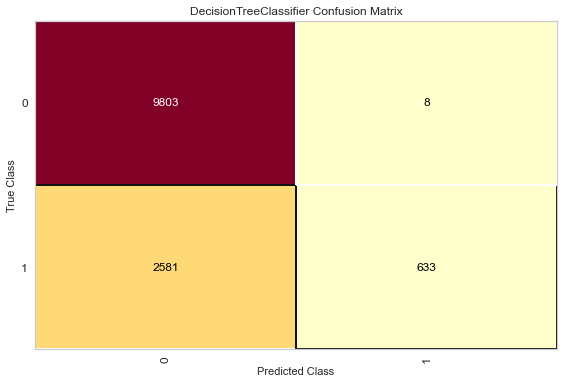

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(dtc, label_encoder={0.0 : '> 50K', 1.0 : '<= 50K ' })
visualizer.fit(d_train, l_train)
visualizer.score(d_test, l_test)
visualizer.show()


Display the decision tree.

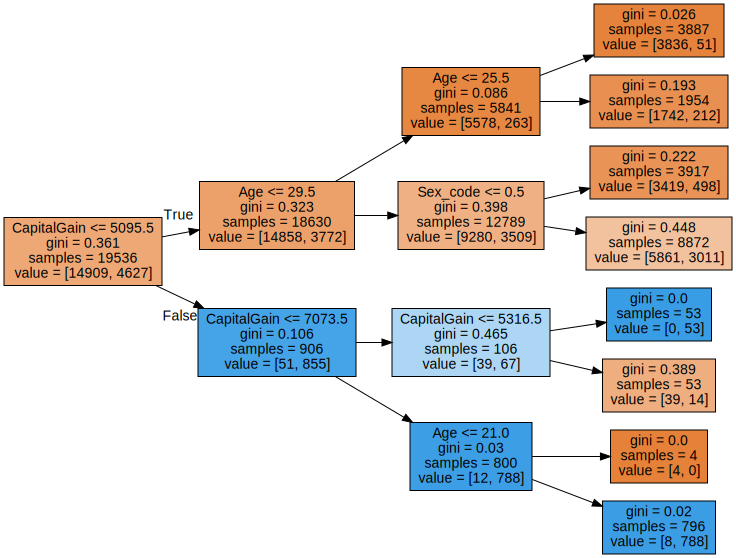

In [19]:
import graphviz
from sklearn.tree import export_graphviz
tree_data = export_graphviz(dtc, out_file=None, feature_names=d_train.columns, filled = True, rotate = True) 
my_tree = graphviz.Source(tree_data) 
my_tree

In [21]:
#my_tree.render(filename = 'example')

'example.pdf'

In [47]:
dtc.feature_importances_
print(f'{"Label":18s} | Importance')
print(36*'-')
for name, val in sorted(zip(d_train.columns, dtc.feature_importances_)):
    print(f'{name:<20s} importance = {val:.2%}')

Label              | Importance
------------------------------------
Age                  importance = 26.67%
CapitalGain          importance = 58.92%
HoursPerWeek         importance = 0.00%
Sex_code             importance = 14.40%
